# 1. Generate and plot the elementary signals in DSP (Impulse, unit Step, ramp, and exponential signals).

### 1.1 Impulse Signal

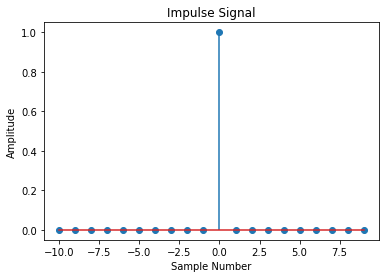

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10, 10)
n =  np.size(x)
y = np.zeros(n)
i = np.where(x==0)
y[i] = 1

plt.stem(x,y, use_line_collection=True)
plt.title("Impulse Signal")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")


plt.show()

### 1.2 Unit Step Signal

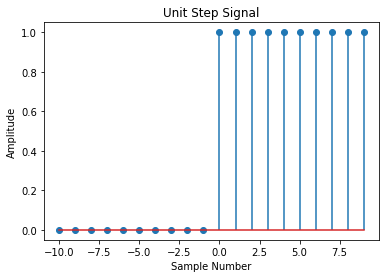

In [ ]:
x = np.arange(-10, 10)
n =  np.size(x)
y = np.zeros(n)
i = np.where(x>=0)
y[i] = 1

plt.stem(x,y, use_line_collection=True)
plt.title("Unit Step Signal")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")


plt.show()

### 1.3 Ramp Signal

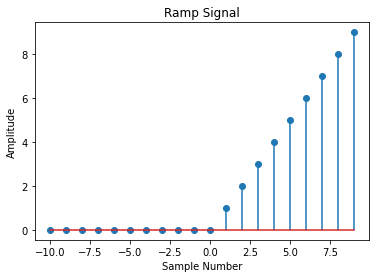

In [ ]:
x = np.arange(-10, 10)
n =  np.size(x)
y = np.zeros(n)
i = np.where(x>=0)
y[i] = x[i]

plt.stem(x,y, use_line_collection=True)
plt.title("Ramp Signal")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")


plt.show()

### 1.4 Exponential Signals

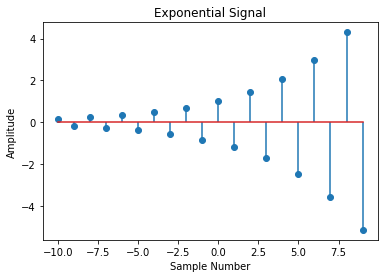

In [ ]:
x = np.arange(-10, 10)
n = -1.2
y = n**x

plt.stem(x,y, use_line_collection=True)
plt.title("Exponential Signal")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")


plt.show()

# 2. Computing the linear convolution of two signals

Convolution: 
[1, 4, 9, 15, 21, 21, 14, 5]
Convolution using library: 
[ 1  4  9 15 21 21 14  5]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


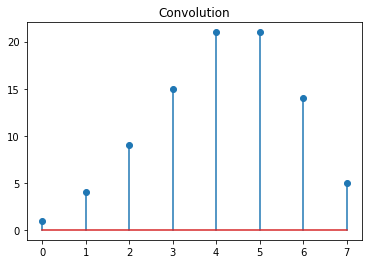

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


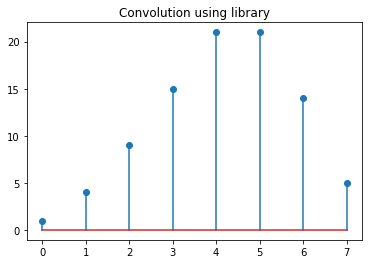

In [ ]:
x = [1, 2, 3, 4, 5]
h = [1, 2, 2, 1]
y1 = [0 for i in range(len(x) + len(h) - 1)]

for n in range(len(x) + len(h) - 1):
  for m in range(len(x)):
    if(n - m >= 0):
      if(n - m < len(h)):
        y1[n] += x[m] * h[n - m]

print("Convolution: ")
print(y1)


y2 = np.convolve(x, h)
print("Convolution using library: ")
print(y2)


plt.stem(y1)
plt.title("Convolution")
plt.show()

plt.stem(y2)
plt.title("Convolution using library")
plt.show()

# 3. Compute the cross-correlation sequence of two signals x(n) and h(n).

In [ ]:
x = [1, 2, 3, 4, 5]
h = [1, 2, 2, 1]
y1 = np.zeros(len(x) + len(h) - 1, dtype=int)
h = np.flip(h)

for n in range(len(x) + len(h) - 1):
  for m in range(len(x)):
    if(n - m >= 0):
      if(n - m < len(h)):
        y1[n] += x[m] * h[n - m]

print("Cross Correlation: ", y1)

y2 = np.correlate(x, h, 'full')
print("Cross Correlation using library: ", y2)

Cross Correlation:  [ 1  4  9 15 21 21 14  5]
Cross Correlation using library:  [ 1  4  9 15 21 21 14  5]


# 4. Determine the autocorrelation sequence of the signal x(n)

In [ ]:
#x = [1, 2, 3, 4, 5]
print("Input hints : [1, 2, 3, 4, 5]")
x = eval(input('Enter the input sequence x[n]='))

h = np.flip(x)
y1 = np.zeros(len(x) + len(x) - 1, dtype=int)

for n in range(len(x) + len(x) - 1):
  for m in range(len(x)):
    if(n - m >= 0):
      if(n - m <len(h)):
        y1[n] += x[m] * h[n - m]

print("Auto Correlation: ", y1)

y2 = np.correlate(x, x, 'full')
print("Auto Correlation using library: ", y2)

Input hints : [1, 2, 3, 4, 5]
Enter the input sequence x[n]=1,2,3,4,5
Auto Correlation:  [ 5 14 26 40 55 40 26 14  5]
Auto Correlation using library:  [ 5 14 26 40 55 40 26 14  5]


# 5. Computing Discrete Fourier Transform (DFT) of a signal using DFT equation.

In [ ]:
def Exponen(k, n, N):
  return np.exp((-2j * np.pi * k * n) / N)

def Dft(x):
  N = len(x)
  X = []
  for k in range(N):
    result = sum((x[n] * Exponen(k, n, N)) for n in range(N))
    X.append(result)
  return X

In [ ]:
#x = [1, 2, 3, 4, 5]
print("Input hints : [1, 2, 3, 4, 5]")
x = eval(input('Enter the input sequence x[n]='))
dft_x1 = Dft(x)
print("DFT result: ", dft_x1)


dft_x2 = np.fft.fft(x, len(x))
print("DFT result using function: ", dft_x2)

Input hints : [1, 2, 3, 4, 5]
Enter the input sequence x[n]=1,2,3,4,5
DFT result:  [(15+0j), (-2.500000000000001+3.440954801177934j), (-2.5+0.8122992405822647j), (-2.499999999999999-0.8122992405822673j), (-2.4999999999999964-3.440954801177935j)]
DFT result using function:  [15. +0.j         -2.5+3.4409548j  -2.5+0.81229924j -2.5-0.81229924j
 -2.5-3.4409548j ]


# 6. Computing inverse DFT of the signal obtained in (5).

In [ ]:
def Idft(X):
  N = len(X)
  x = []
  for n in range(N):
    result = sum(X[k] * np.exp((2j * np.pi * k * n) / N) for k in range(N))
    result /= N
    x.append(result)
  return x

In [ ]:
#x = [1, 2, 3, 4, 5]
print("Input hints : [1, 2, 3, 4, 5]")
x = eval(input('Enter the input sequence x[n]='))

dft_x = Dft(x)
idft_x1 = Idft(dft_x)
print("IDFT result: ", idft_x1)

idft_x2 = np.fft.ifft(dft_x)
print("IDFT result using function: ", idft_x2)

Input hints : [1, 2, 3, 4, 5]
Enter the input sequence x[n]=1,2,3,4,5
IDFT result:  [(1.0000000000000009-7.105427357601002e-16j), (2-4.440892098500626e-16j), (3+0j), (4+2.220446049250313e-16j), (5+2.664535259100376e-16j)]
IDFT result using function:  [1.-7.99360578e-16j 2.-6.00327315e-16j 3.-3.02228507e-16j
 4.+4.04004697e-16j 5.+1.29791170e-15j]


# 7. By means of the DFT and IDFT, determine the response of the FIR filter with impulse response h(n) to the input sequence x(n)

In [ ]:
x = [1, 2, 3, 4, 5]
h = [1, 2, 2, 1]

print("Convolution of x and h: ", np.convolve(x, h))
x_len = len(x)
h_len = len(h)

for i in range(h_len - 1):
  x.append(0)

for i in range(x_len - 1):
  h.append(0)

X = Dft(x)
H = Dft(h)

ans = [0 for i in range(len(X))]

for i in range(len(X)):
  ans[i] = X[i] * H[i]

idft_ans = Idft(ans)
print("Convolution after IDFT: ", idft_ans)

Convolution of x and h:  [ 1  4  9 15 21 21 14  5]
Convolution after IDFT:  [(1-3.552713678800501e-15j), (4-8.881784197001252e-16j), (9-8.881784197001252e-16j), (14.999999999999996+8.881784197001252e-16j), (20.999999999999996-2.886579864025407e-15j), (21-6.661338147750939e-15j), (14.000000000000007+3.552713678800501e-15j), (4.999999999999986+1.0658141036401503e-14j)]


# 8. Compute the Fast Fourier Transform (FFT) using divide and conquer approach.

In [ ]:
def Fft_dev_conq(x, R):
  N = len(x)
  C = int(N/R)

  mat = [[0 for col in range(C)] for row in range(R)]
  for row in range(R):
    for col in range(C):
      mat[row][col] = x[col * R + row]

  dft = []
  for row in range(R):
    dft.append(Dft(mat[row]))

  for row in range(R):
    for col in range(C):
      dft[row][col] = dft[row][col] * Exponen(row, col, N)

  for col in range(C):
    column_values = []
    for row in range(R):
      column_values.append(dft[row][col])
    column_values = Dft(column_values)
    for row in range(R):
      dft[row][col] = column_values[row]

  result = []

  for row in range(len(dft)):
    for col in range(len(dft[0])):
      result.append(dft[row][col])

  return result

In [ ]:
# x = [0, 1, 2, 3, 3, 2, 1, 0]
print("Input hints : [0, 1, 2, 3, 3, 2, 1, 0]")
x = eval(input('Enter the input sequence x[n]='))
R = 2
fft_x1 = Fft_dev_conq(x, R)
print("FFT using divide & conquer: ", fft_x1)

Input hints : [0, 1, 2, 3, 3, 2, 1, 0]
Enter the input sequence x[n]=0,1,2,3,3,2,1,0
FFT using divide & conquer:  [(12+0j), (-5.82842712474619-2.414213562373096j), (1.2246467991473535e-16+1.2246467991473525e-16j), (-0.17157287525381015-0.41421356237309515j), -7.347880794884119e-16j, (-0.1715728752538097+0.41421356237309537j), (-1.2246467991473535e-16+1.2246467991473522e-16j), (-5.82842712474619+2.4142135623730923j)]


# 9. Compute the FFT of a given signal with N = 8 using Radix-2 algorithm.

In [ ]:
def Fft_radix2(x):
  N = len(x)
  if N == 2:
    dft = Dft(x)
    return dft

  x0 = []
  x1 = []

  for i in range(len(x)):
    if i % 2 == 0:
      x0.append(x[i])
    else:
      x1.append(x[i])

  X0 = Fft_radix2(x0)
  X1 = Fft_radix2(x1)
  result = []
  for k in range(int(N / 2)):
    result.append(X0[k] +  X1[k] * np.exp((-2j * np.pi * k) / N))

  for k in range(int(N / 2)):
    result.append(X0[k] -  X1[k] * np.exp((-2j * np.pi * k) / N))
  return result

In [ ]:
# x = [0, 1, 2, 3, 3, 2, 1, 0]
print("Input hints : [0, 1, 2, 3, 3, 2, 1, 0]")
x = eval(input('Enter the input sequence x[n]='))

fft_x2 = Fft_radix2(x)
print("FFT using radix-2: ", fft_x2)

Input hints : [0, 1, 2, 3, 3, 2, 1, 0]
Enter the input sequence x[n]=0,1,2,3,3,2,1,0
FFT using radix-2:  [(12+0j), (-5.82842712474619-2.414213562373096j), 0j, (-0.17157287525381015-0.4142135623730946j), 0j, (-0.1715728752538097+0.4142135623730949j), 0j, (-5.82842712474619+2.414213562373094j)]
